# Exploratory Data Analysis (EDA)

## ***Introduction***

*This assignment focuses on one of the most important aspects of data science, Exploratory Data Analysis (EDA). Many surveys show that data scientists spend 60-80% of their time on data preparation. EDA allows you to identify data gaps & data imbalances, improve data quality, create better features and gain a deep understanding of your data before doing model training - and that ultimately helps train better models. In machine learning, there is a saying - "better data beats better algorithms" - meaning that it is more productive to spend time improving data quality than improving the code to train the model.*

*This will be an exploratory exercise, so feel free to show errors and warnings that arise during the analysis.*

## ***Dataset***

*A Portuguese bank conducted a marketing campaign (phone calls) to predict if a client will subscribe to a term deposit. The records of their efforts are available in the form of a dataset. The objective here is to apply machine learning techniques to analyze the dataset and figure out most effective tactics that will help the bank in next campaign to persuade more customers to subscribe to the bank's term deposit. Download the Bank Marketing Dataset from: https://archive.ics.uci.edu/dataset/222/bank+marketing.*

## ***Assignment***

1. ***Exploratory Data Analysis***

    *Review the structure and content of the data and answer questions such as:*
    - *Are the features (columns) of your data correlated?* (NB and RR)
    - *What is the overall distribution of each variable?* (NB)
    - *Are there any outliers present?* (NB)
    - *What are the relationships between different variables?* (NB and RR)
    - *How are categorical variables distributed?* (NB)
    - *Do any patterns or trends emerge in the data?* (?)
    - *What is the central tendency and spread of each variable?* (NB)
    - *Are there any missing values and how significant are they?* (NB)

2. ***Algorithm Selection***

    *Now you have completed the EDA, what Algorithms would suit the business purpose for the dataset. Answer questions such as:*
    - *Select two or more machine learning algorithms presented so far that could be used to train a model (no need to train models - I am only looking for your recommendations).* (NB and RR)
    - *What are the pros and cons of each algorithm you selected?* (NB and RR)
    - *Which algorithm would you recommend, and why?* (NB and RR)
    - *Are there labels in your data? Did that impact your choice of algorithm?* (NB)
    - *How does your choice of algorithm relates to the dataset?* (NB and RR)
    - *Would your choice of algorithm change if there were fewer than 1,000 data records, and why?* (NB)

3. ***Pre-processing***

    *Now you have done an EDA and selected an Algorithm, what pre-processing (if any) would you require for:*
    - *Data Cleaning - improve data quality, address missing data, etc.* (NB)
    - *Dimensionality Reduction - remove correlated/redundant data than will slow down training*
    - *Feature Engineering - use of business knowledge to create new features* (NB)
    - *Sampling Data - using sampling to resize datasets*
    - *Data Transformation - regularization, normalization, handling categorical variables* (NB)
    - *Imbalanced Data - reducing the imbalance between classes*

## Step 1: Exploratory Data Analysis

### Load Libraries and Dataset

First, we import libraries and load the dataset.

In [73]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import zipfile
import io
import requests
from imblearn.under_sampling import RandomUnderSampler

We use `bank-additional-full.csv` with all examples, ordered by date (from May 2008 to November 2010). The data is enriched from the "Bank Marketing" UCI dataset by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb. This dataset is almost identical to the original, but it was found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included.

We load the data and display the first few rows to understand its structure.

In [52]:
# Download the zip file from the internet
url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
response = requests.get(url)

# Extract bank-additional.zip from the downloaded zip
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('bank-additional.zip') as additional_zip_file:
        with zipfile.ZipFile(additional_zip_file) as additional_zip:
            # Extract bank-additional-full.csv from bank-additional.zip
            with additional_zip.open('bank-additional/bank-additional-full.csv') as csvfile:
                df = pd.read_csv(csvfile, sep=';')

df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
print("DataFrame shape:", df.shape)

DataFrame shape: (41188, 21)


### Correlation and Relationships between Variables

The features of our data are correlated. We visualize correlation between variables and print the top 5 most highly correlated numeric column pairs below.

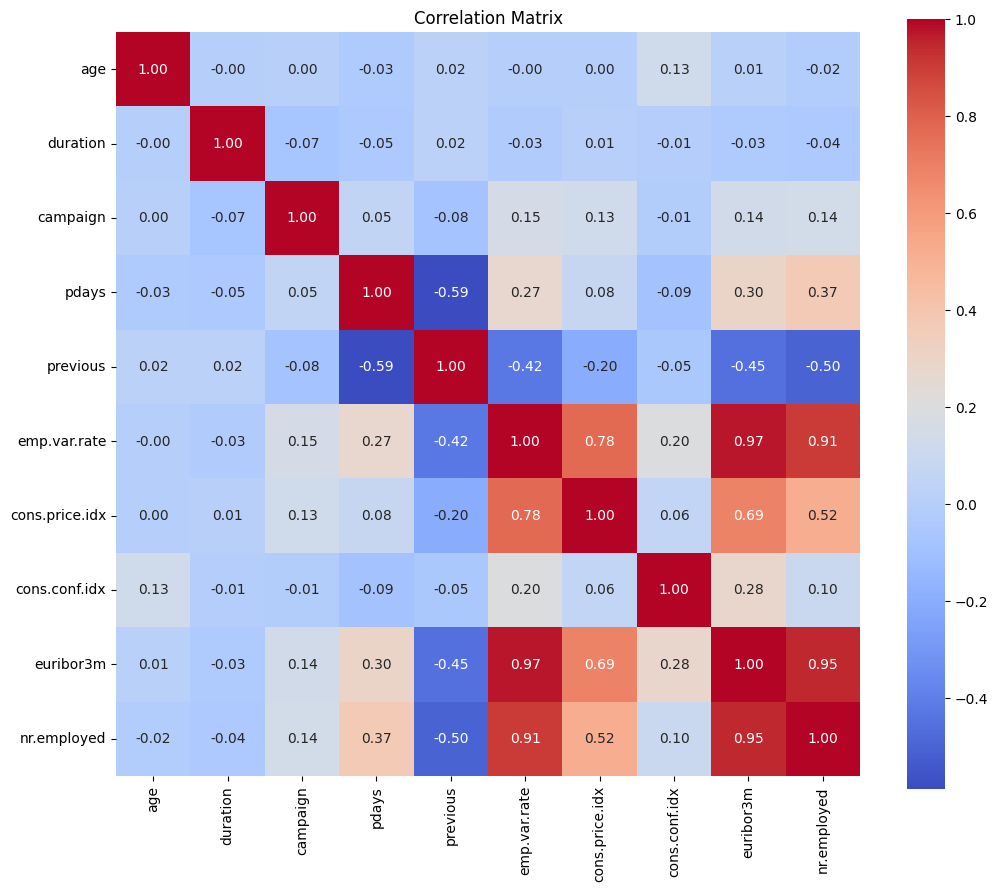

`emp.var.rate` is highly positively correlated with `euribor3m` (0.97).
`euribor3m` is highly positively correlated with `nr.employed` (0.95).
`emp.var.rate` is highly positively correlated with `nr.employed` (0.91).
`emp.var.rate` is highly positively correlated with `cons.price.idx` (0.78).
`cons.price.idx` is highly positively correlated with `euribor3m` (0.69).


In [54]:
# Create correlation matrix for numeric columns only
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Get the absolute correlation matrix and set diagonal to 0 to ignore self-correlation
high_corr = corr_matrix.unstack().to_frame('correlation') # Unstack the correlation matrix
high_corr['sign'] = np.where(high_corr['correlation'] >= 0, 'positive', 'negative') # Add a new column indicating if the correlation is positive or negative
high_corr['correlation'] = high_corr['correlation'].abs().drop_duplicates()
high_corr = high_corr[high_corr['correlation'] < 1]
high_corr = high_corr.sort_values(by='correlation', ascending=False)

for (var1, var2), row in high_corr.head(5).iterrows():
    print(f"`{var1}` is highly {row['sign']}ly correlated with `{var2}` ({row['correlation']:.2f}).")


The pairs (`emp.var.rate`,`euribor3m`) and (`euribor3m`, `nr.employed`) are highly correlated with eachother which makes two of these columns a good candidate for removal from the dataset.

We also visualize the relationship between each categorical variable and the target variable `y`. The stacked bar charts show which categories are stronger predictors of a `Yes` or `No` determination.

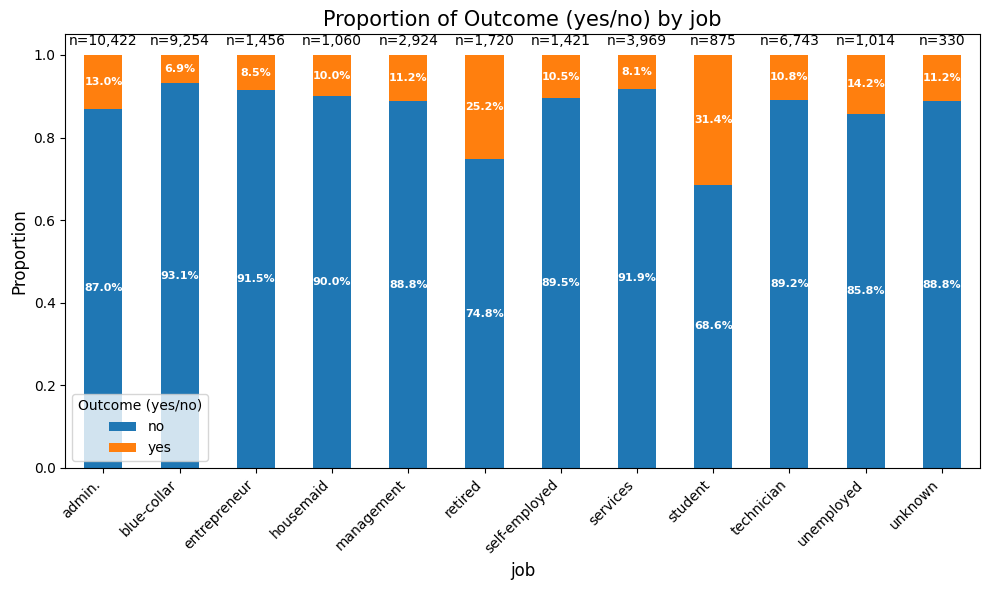

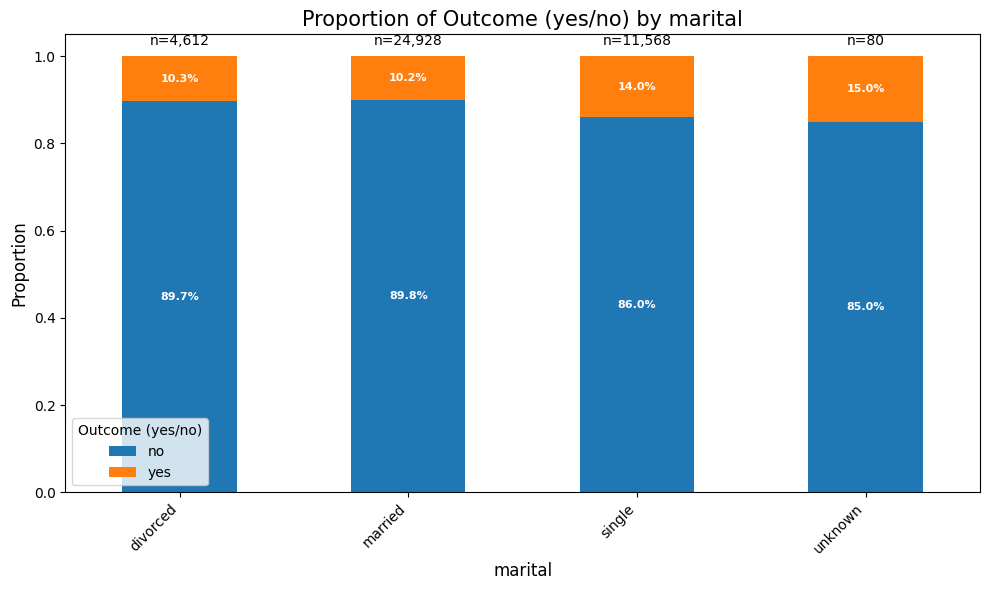

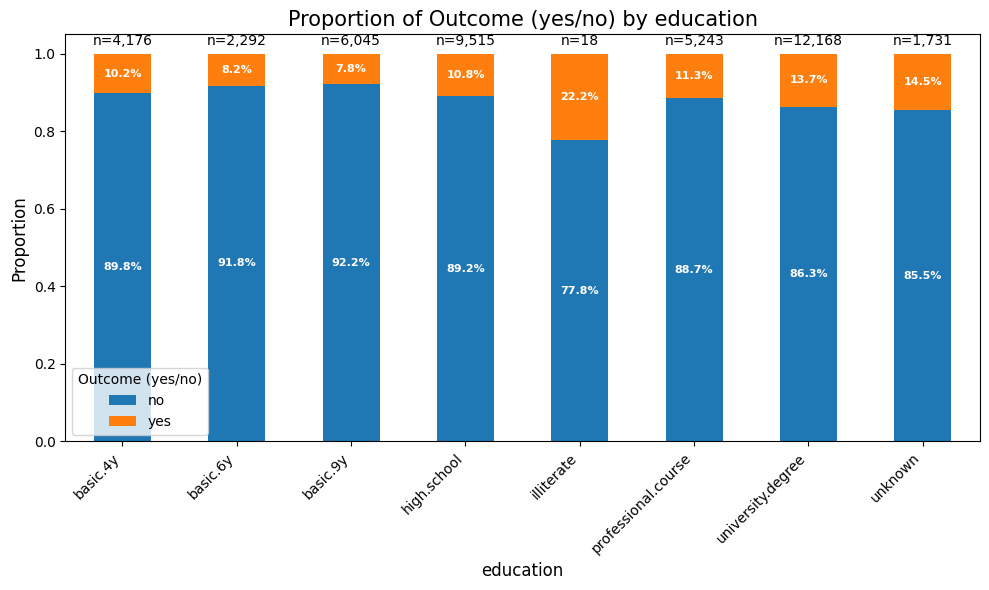

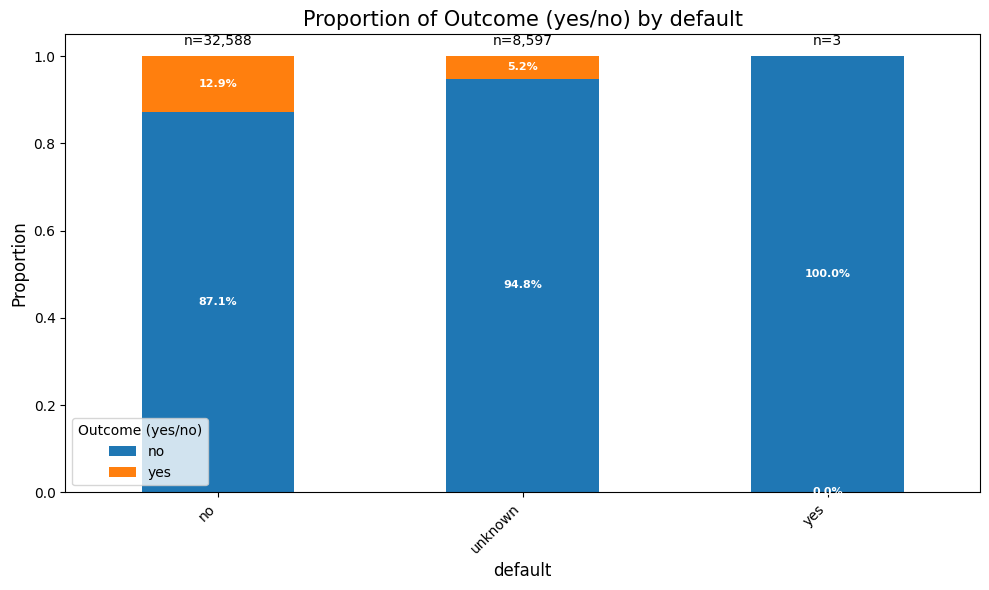

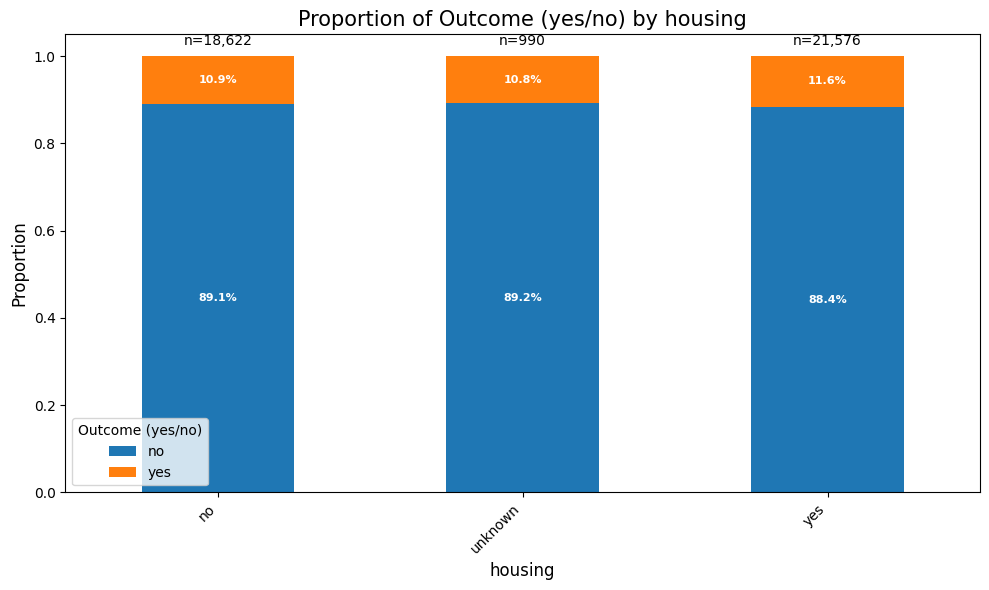

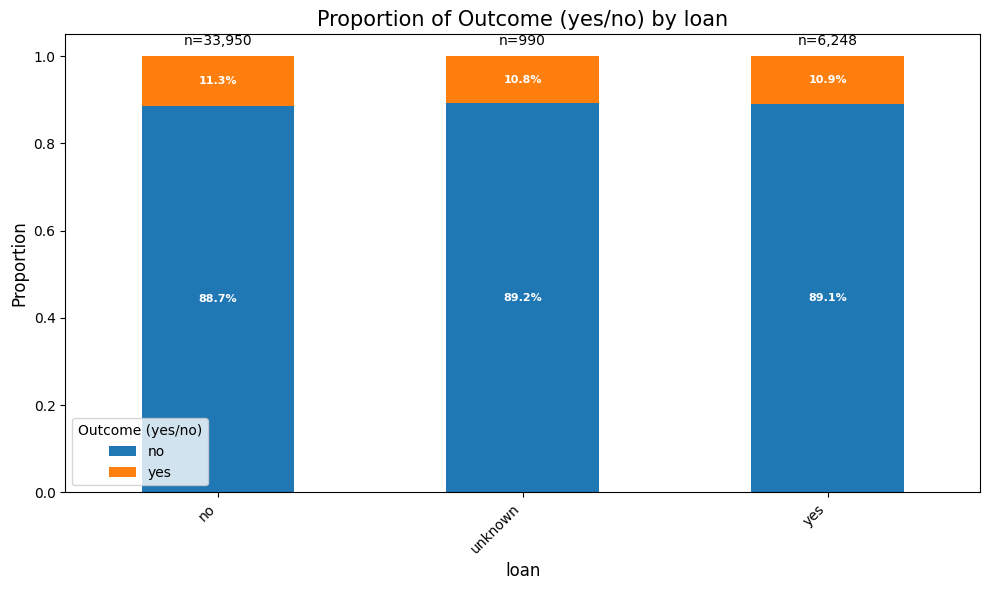

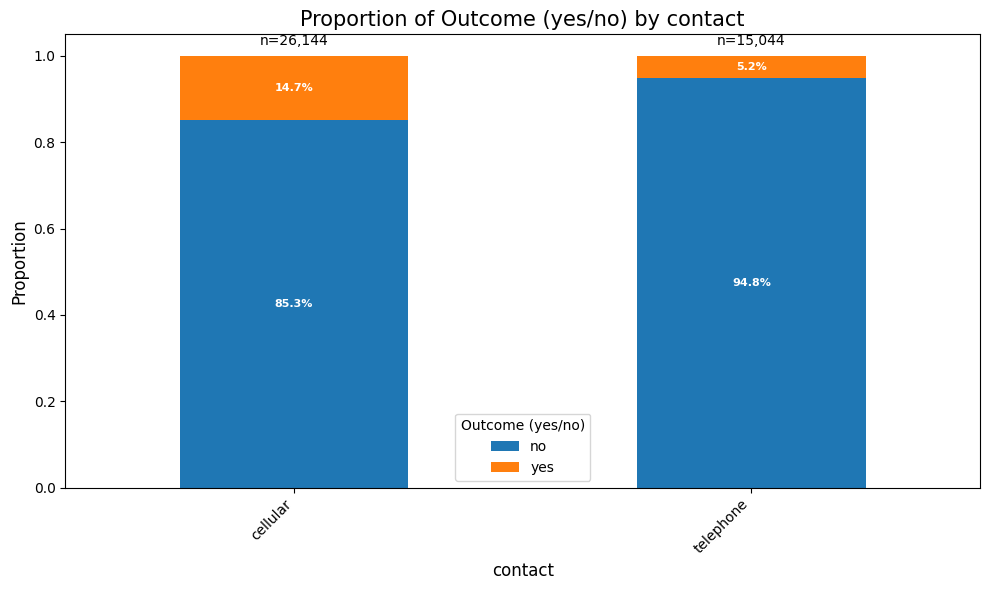

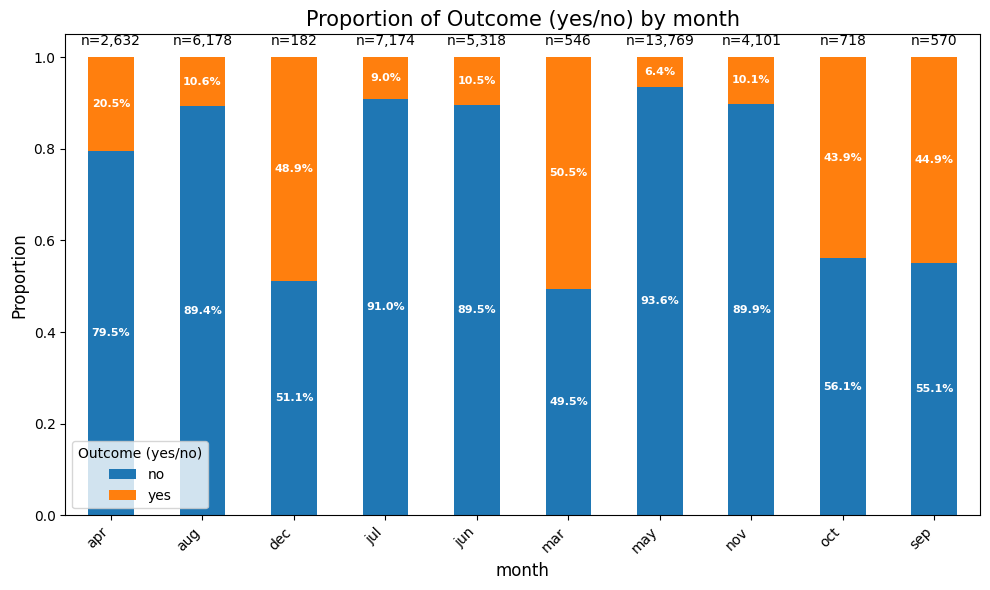

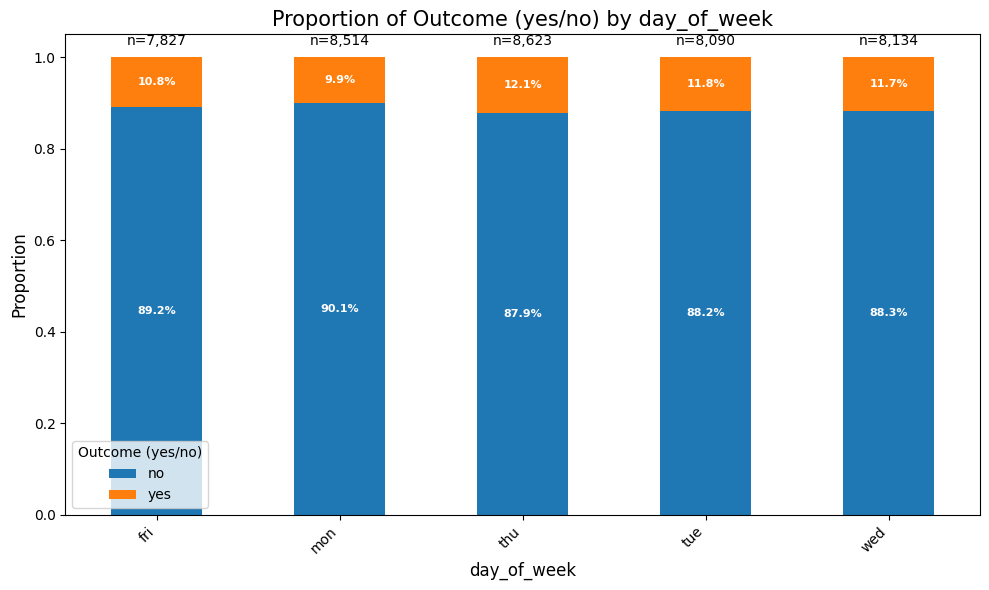

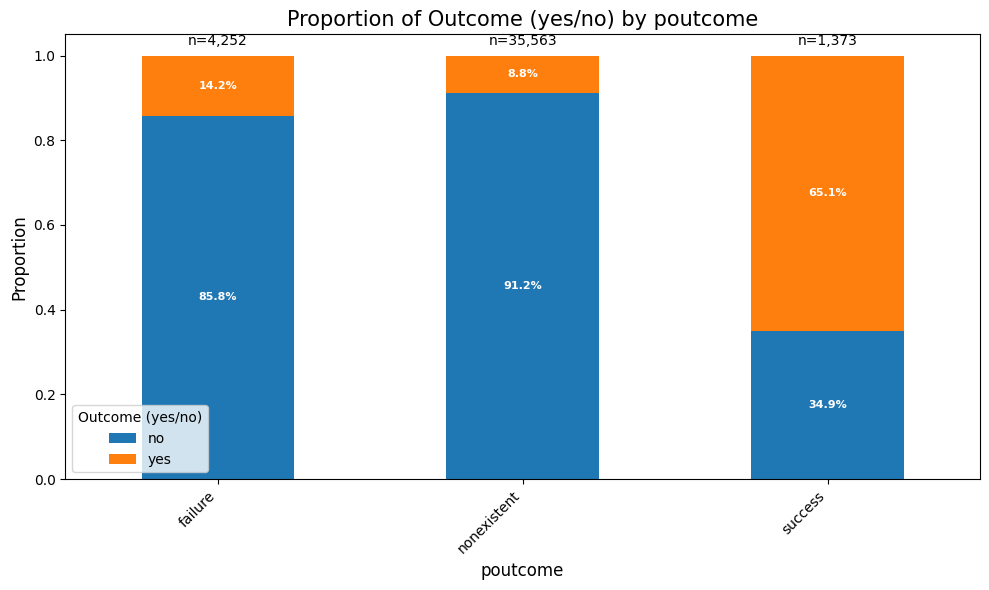

In [55]:
categorical_predictors = df.select_dtypes(include=['object']).columns.drop('y')

for column in categorical_predictors:
    # Create a crosstab to get the proportions.
    # normalize='index' calculates percentages row-wise (to sum to 100% for each category)
    crosstab_df = pd.crosstab(df[column], df['y'], normalize='index')

    # Get the value counts for the current column
    value_counts = df[column].value_counts()

    # Create the plot
    ax = crosstab_df.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 6)
    )

    # Add formatting for clarity
    plt.title(f"Proportion of Outcome (yes/no) by {column}", fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Outcome (yes/no)')
    plt.tight_layout() # Ensures labels don't get cut off

    # Add percentage labels inside the bars for readability
    for container in ax.containers:
        ax.bar_label(container, fmt='{:.1%}', label_type='center', color='white', weight='bold', fontsize=8)
    
    # Add count labels on top of each bar line
    # Iterate through each unique category (the x-axis ticks)
    for i, category in enumerate(crosstab_df.index):
        count = value_counts.get(category, 0) # Get the count for the category
        # Get the height of the stacked bar, which is always 1.0 (or 100%) because normalize='index'
        max_height = 1.05 # A little above the top of the bar
        ax.text(
            x=i,
            y=max_height,
            s=f"n={count:,}", # The label text
            ha='center',
            va='top',
            fontsize=10,
            color='black'
        )

    # Display the plot (optional, can be commented out if you just want to save files)
    plt.show()

All percentages are stated in the proportion of outcomes that are `No` with respect to all loans.

1. From `Job`, we can visually see that some careers have a much higher proportion of being accepted such as Student (58.6%) and Retired (74.8%)
2. There is very little variation between the outcome and the `marital` status (min = 85.0%, max = 89.7%)
3. `Education` has very little variation outside of being "iliterate" which has a very small sample size (n=18)
4. `Default` has a 100% chance of a No outcome when it Yes (IE, if a request had defaulted in the past then they will not be accepted)
5. `Default` has a 100% no outcome when the applicant has defaulted but the sample size of this outcome is very small (n=3)
6. There is very little variation between `Housing` and outcome (min = 88.4%, max = 89.1%)
7. There is very little variation between `Loan` and outcome (min = 88.7%, max = 89.1%)
8. `Contact` has some strong variation between the two categories (cellular = 85.3%, telephone = 94.8%)
9. `Month` initially seems to have strong predictive ability but the months where there is a much lower proportion the sample size is very small (n(Dec) = 182, n(mar) = 546, n(oct) = 718, n(sep) = 570)
10. `day_of_week` doesn't seem to have great variation.
11. `poutcome` seems to have predictive potential as when it is success the proportion of no is 34.9% with a significant sample (n = 1,373). The other 2 categoreis also have some variation between them

#### Determining Predictive Power of Each Categorical Variable Using Weight of Evidence

Using the article on [listendata.com](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html#what_is_weight_of_evidence) by Deepanshu Bhalla, we can use the Weight of Evidence (Woe) and Information Value (IV) to calculate a numerical metric that'll help identify powerful categorical predictors. This method can also be applied to numeric features by binning the numbers into a set number of bins. Although we've already taken a look at numerical features, we will use this method to compare the results.

This method is essentially designed for binary logistic regression as conditional logs are highly related to the weight of evidence.

In the site, the author provided a function and some code that calculates IV and WoE. This code is in the cell directly below:

In [56]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        #print(d)
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe:
            print(d)
    return newDF, woeDF

With the function defined, we'll use it to see the WoE and IV values for each column in the dataset:

In [57]:
# First we must map our outcome to 1 = yes and 0 = no:
woe_iv_df = df.copy()
woe_iv_df['binary_y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
woe_iv_df = woe_iv_df.drop(
    columns = ['y']
)

df_iv, df_woe = iv_woe(
    data = woe_iv_df,
    target = 'binary_y',
    #show_woe = True
)

df_iv.sort_values('IV')

,Variable,IV
0,pdays,0.000000
0,loan,0.000269
0,housing,0.001383
0,day_of_week,0.006493
0,marital,0.028215
0,education,0.048576
0,campaign,0.054246
0,default,0.127776
0,age,0.139397
0,job,0.188713


A handy way to interpret these scores is to look at the table below. As part of this table, we've added the variables which fall into these categoreis:

| Information Value | Variable Predictiveness | Variables in category |
| :--- | :--- | :--- |
| Less than 0.02 | Not useful for prediction | `pdays`, `loan`, `housing`, `day_of_week` |
| 0.02 to 0.1 | Weak predictive Power | `marital`, `education`, `campaign` |
| 0.1 to 0.3 | Medium predictive Power | `default`, `age`, `job`, `contact` |
| 0.3 to 0.5 | Strong predictive Power | `previous`, `cons.price.idx`, `month` |
| >0.5 | Suspicious Predictive Power | `poutcome`, `cons.conf.idx`, `euribor3m`, `emp.var.rate`, `nr.employed`, `duration` |

### Distribution, Central Tendency, Spread, and Outliers

We check the overall distribution of each variable and look for outliers, starting with numeric variables.

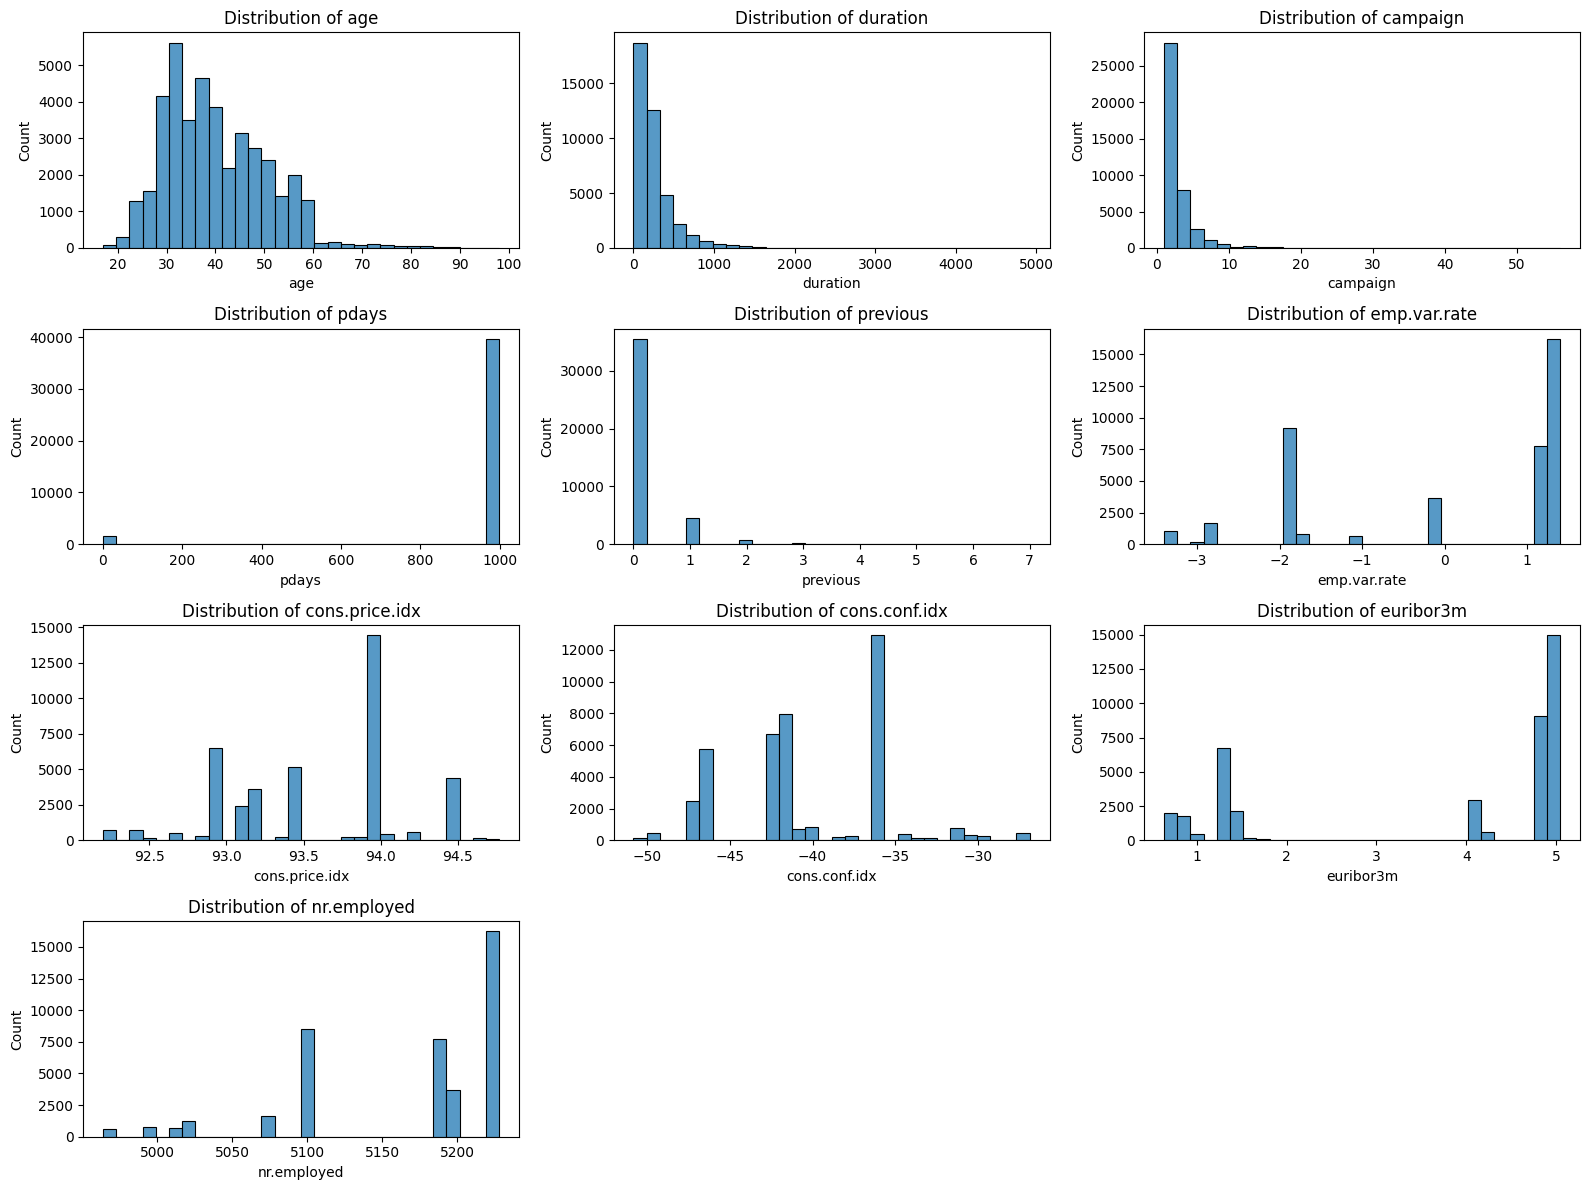

,mean,std,min,50%,max
age,40.02,10.42,17.00,38.00,98.00
duration,258.29,259.28,0.00,180.00,4918.00
campaign,2.57,2.77,1.00,2.00,56.00
pdays,962.48,186.91,0.00,999.00,999.00
previous,0.17,0.49,0.00,0.00,7.00
emp.var.rate,0.08,1.57,-3.40,1.10,1.40
cons.price.idx,93.58,0.58,92.20,93.75,94.77
cons.conf.idx,-40.50,4.63,-50.80,-41.80,-26.90
euribor3m,3.62,1.73,0.63,4.86,5.04
nr.employed,5167.04,72.25,4963.60,5191.00,5228.10


In [58]:
# Visualize distribution of numeric variables
numeric_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Calculate central tendency and spread for each numeric variable, rounded to 2 decimals
desc = df.describe(include=[np.number]).T[['mean', 'std', 'min', '50%', 'max']].round(2)
display(desc)

- `age` is roughly normally distributed with a slight right skew. 
- `duration` and `campaign` are both right-skewed with high outliers.
- `previous` is right-skewed with a median of 0 and a mean of 0.17.
- The distribution of `pdays` is highly right-skewed with a large number of outliers. This is likely due to the fact that 999 means the client was not previously contacted. The median is 999 and the mean is 962.5.
- `emp.var.rate`, `cons.price.idx`, and `cons.conf.idx` are roughly normally distributed.
- `euribor3m` is bimodally distributed with peaks around 1 and 5. 
- `nr.employed` is left-skewed.

Next, we visualize the overall distribution of each categorical variable below by plotting bar plots.

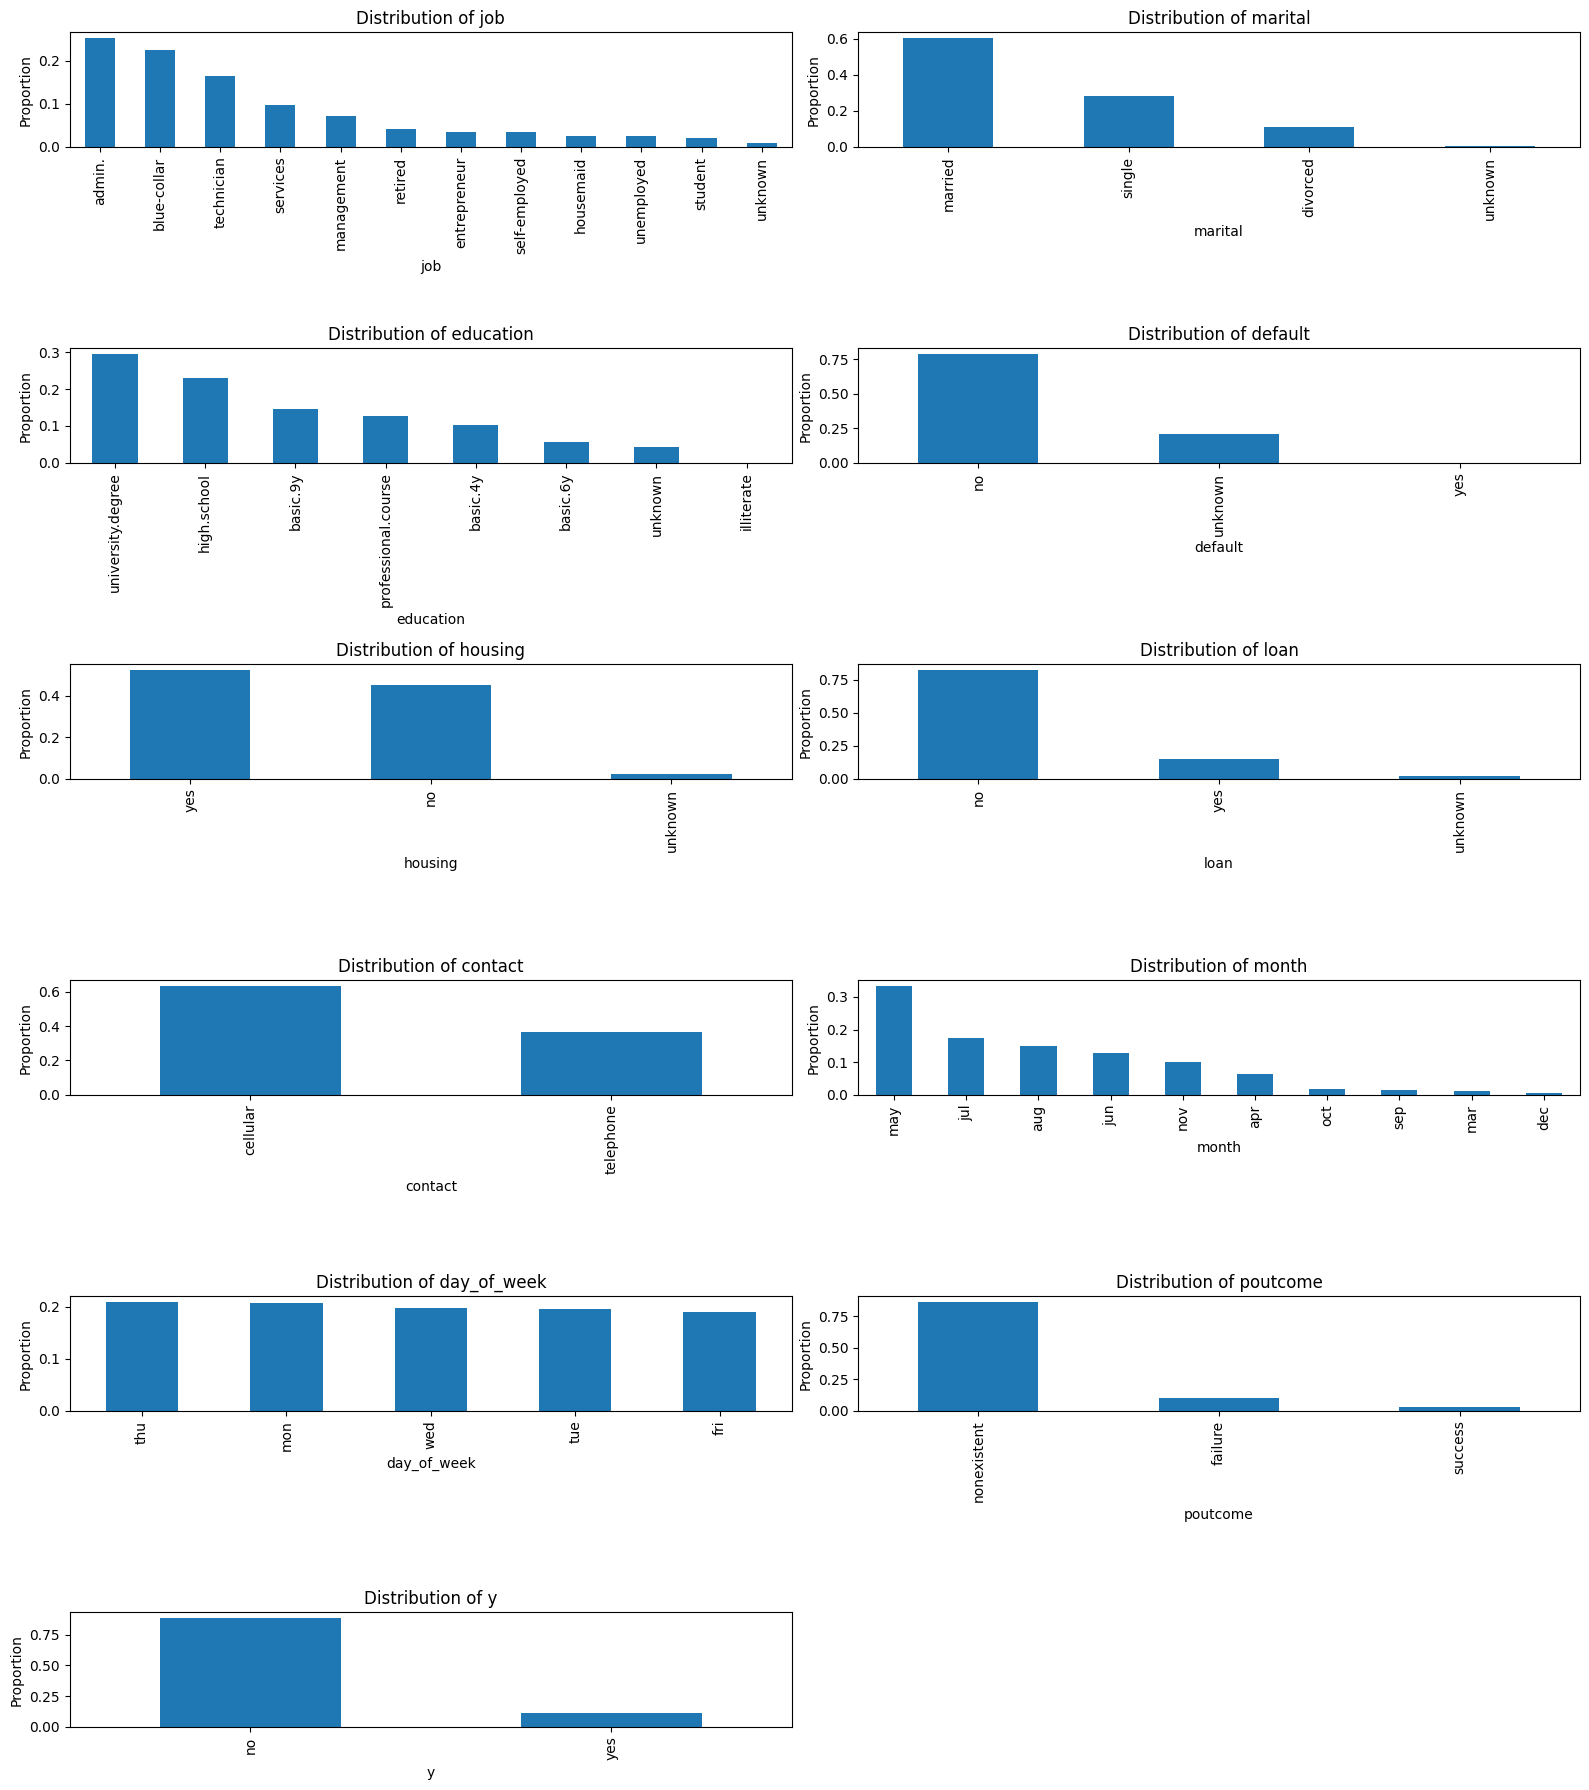

,top,freq
job,admin.,10422
marital,married,24928
education,university.degree,12168
default,no,32588
housing,yes,21576
loan,no,33950
contact,cellular,26144
month,may,13769
day_of_week,thu,8623
poutcome,nonexistent,35563


In [59]:
# Visualize distribution of categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(16, 18))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(6, 2, i)
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Proportion')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# For categorical variables, show the mode and frequency
desc_cat = df.describe(include=['object']).T[['top', 'freq']]
display(desc_cat)

- Most clients are administrative workers (n = 10,422), are married (n = 24,928), have a universiversity degree (n = 12,168), do not have credit in default (n = 32,588), have a housing loan (n = 21,576), do not have a personal loan (n = 33,950), and were contacted via cellular phone (n = 26,144).
- Summer months (May, July, and August) were more commonly the last contact month with clients.
- The last contact day of the week is fairly evenly distributed between weekdays.
- Most clients were not contacted as part of the previous marketing campaign (n = 35,563).

### Missing Values

There are no missing observations in this dataset.

In [60]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

However, there are some observations set as "unknown" in several categorical columns. Additionally, the `pdays` column has a value of 999 which means the client was not previously contacted. We will treat these as missing values.

In [61]:
# Check for categorical variables that are "unknown" and replace 'unknown' with np.nan in all object (categorical) columns
df_nas = df.copy()
df_nas = df_nas.replace('unknown', np.nan)
df_nas = df_nas.replace(999, np.nan)  # Replace 999 in 'pdays' with np.nan

# Check for categorical variables that are now NA
na_counts = df_nas.isna().sum()
na_counts = na_counts[na_counts > 0].sort_values(ascending=False)
na_perc = (na_counts / len(df_nas)) * 100
print("Columns with NA values and their % missing:")
print(na_perc.round(2))

Columns with NA values and their % missing:
pdays        96.32
default      20.87
education     4.20
housing       2.40
loan          2.40
job           0.80
marital       0.19
duration      0.00
dtype: float64


`pdays` is now 96% missing in cases where the client has not been previously contacted. `default` (whether or not the client has credit in default) has significant missingness. `education` (education level), `housing` (whether the client has a housing loan), `loan` (whether the client has a personal loan), `job` (type of job), and `marital` (marital status) have some minor missingness. We will address this missingness in the Pre-processing section.



## Step 2: Algorithm Selection

Now that we've completed the EDA, we select the following machine learning algorithms to train a binary classification model (predicting whether or not a client will subscribe to a term deposit):

> NOTE: We say Naive Bayes needs a sizeable amount of data but we also say it performs well on small datasets. Address this contradiction?

| Algorithm            | Pros                                                                                                                                                                                                                                                                                                                                                                          | Cons                                                                                                                                                                                                                               |
|----------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Logistic Regression** | - Allows us to predict the probability of a particular event (in our case, whether or not a client will subscribe to a term deposit).                                                                                                                                                                                                                                       | - Assumes a linear relationship between the independent variables and the log-odds of the dependent variable.<br>- Sensitive to outliers.<br>- Requires that there is little or no multicollinearity among the independent variables. |
| **Naive Bayes**         | - Simplicity and computational efficiency.<br>- It does a great job handling categorical features directly, without any preprocessing. (This is also a con since our features are a mix of categorical and continuous.)<br>- Outperforms more sophisticated classifiers when working with a large number of predictors. We only we have 21 features, but this is still a plus.<br>- It handles noisy and missing data pretty well. We have some missingness.<br>- Naïve Bayes classifiers are easy to implement and tend to perform particularly well on relatively small datasets compared to other algorithms. | - Needs a sizable amount of data.<br>- It is naïve: assumption of independence between inputs & classes. We have some correlated features in our dataset, so this is a drawback.<br>- Doesn’t work well for datasets with a large number of continuous features, which we have.<br>- It assumes that all features within a class are not only independent but are equally important. |
| **KNN**                | - The KNN classifier offers an alternative approach to classification via lazy learning.<br>- Doesn't require a rich amount of data in order to begin making predictions.                                                                                                                                                                                                  | - Has a more computationally expensive prediction step.                                                                                                                                                                            |

There are labels in our data (yes/no for term deposit subscription). This impacts our choice of algorithm because it means we are looking at binary classification algorithms specifically.

If the dataset were much smaller (fewer than 1,000 records), Naive Bayes would be a good option since it tends to perform better than other models even with smaller datasets.

We can also strike KNN as we have a dataset with 41,188 observations, which negates KNN's advantage of being able to provide insight during a cold start (where we have too few observations).

We recommend using a **logistic regression** because it's easy to interpret, computationally efficient, and gives us probabilistic predictions for our binary outcome. In order to be able to mitigate the con of little or no multicollinearity, we would need to perform dimensionality reduction techniques.

## Step 3: Pre-processing

### Data cleaning

We drop `default`, whether the client has credit in default, since it is 21% missing and there is little risk of losing valuable information that our classifier needs to discriminate between classes (most clients with known data are not in default. 79% no, <1% yes, 20% unknown). We also drop `pdays` (number of days that passed by after the client was last contacted from a previous campaign) since it is 96% missing and was determined to be not useful for prediction according to the IV. For the other columns with minor missingness (`education`, `housing`, `loan`, `job`, and `marital`), we will drop rows with missing data. Since the missingness is low, we will not lose much information by dropping these rows.

In [62]:
# Save a new dataframe for preprocessing
df_dropped = df_nas.copy()

# Remove `default` and `pdays` columns due to high missingness
df_dropped = df_dropped.drop(columns=['default', 'pdays'])

# Drop rows with missing values in other columns
df_dropped = df_dropped.dropna()

# Display ns before and after dropping missing values
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_dropped.shape}")

Original dataset shape: (41188, 21)
Cleaned dataset shape: (38243, 19)


We still have sufficient data to run a logistic regression model with, even after removing rows with missing values. 

### Feature Engineering

We map ordinal categorical variables to numeric values. In this case, we map the education levels to estimated number of years of schooling.

In [63]:
df_fe = df_dropped.copy()

# Map education levels to numeric values
education_mapping = {
    'illiterate': 0,                # 0 years
    'basic.4y': 4,                  # 4 years
    'basic.6y': 6,                  # 6 years
    'basic.9y': 9,                  # 9 years
    'high.school': 12,              # 12 years (typical for high school)
    'professional.course': 14,      # 14 years (post-secondary/professional)
    'university.degree': 16         # 16 years (bachelor's degree)
}
df_fe['education'] = df_fe['education'].map(education_mapping)

### Data Transformation

Because logistic regression requires categorical variables to be encoded numerically (the algorithm works with numbers, not labels), we use one-hot encoding for nominal categorical variables.

In [64]:
# One-hot encode nominal categorical variables
df_dummies = df_fe.copy()
df_dummies = pd.get_dummies(df_dummies, columns=['job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], drop_first=True)
df_dummies = df_dummies.rename(columns={'y_yes': 'y'})

We also standardardize numerical columns since the majority of machine learning and optimization algorithms behave much better if features are on the same scale. We are using `RobustScaler()` to reduce the influence of outliers.

In [65]:
# Identify numerical columns
num_cols = df_dummies.select_dtypes(include=[np.number]).columns
df_standardized = df_dummies.copy()
scaler = RobustScaler()

# Fit and transform the numerical columns
df_standardized[num_cols] = scaler.fit_transform(df_standardized[num_cols])

df_standardized.head()

,age,education,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,1.200000,-1.142857,0.377880,-0.5,0.0,0.0,0.598477,0.857143,0.0,0.0,...,False,False,False,True,False,False,False,True,False,False
1,1.266667,0.000000,-0.138249,-0.5,0.0,0.0,0.598477,0.857143,0.0,0.0,...,False,False,False,True,False,False,False,True,False,False
2,-0.066667,0.000000,0.216590,-0.5,0.0,0.0,0.598477,0.857143,0.0,0.0,...,False,False,False,True,False,False,False,True,False,False
3,0.133333,-0.857143,-0.129032,-0.5,0.0,0.0,0.598477,0.857143,0.0,0.0,...,False,False,False,True,False,False,False,True,False,False
4,1.200000,0.000000,0.589862,-0.5,0.0,0.0,0.598477,0.857143,0.0,0.0,...,False,False,False,True,False,False,False,True,False,False


### Dimensionality Reduction

`emp.var.rate`, `euribor3m`, and `nr.employed` are all highly correlated with eachother (r = 0.91 to 0.97). To this end, we perform PCA (Principal Component Analysis) to reduce the feature space and remove some predictors. PCA is an unsupervised technique that reduces dimensionality by maximizing variance, independent of the target variable. Via PCA, we create principal components that represent linear combinations of the features.

In [66]:
# Separate features and target
X = df_standardized.drop(columns=['y'])
y = df_standardized['y']

In [67]:
# Randomly split the X and y arrays into 30 percent test data and 70 percent training data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [68]:
# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(random_state=1, solver='lbfgs')

# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train) # standardized training data
X_test_pca = pca.transform(X_test) # standardized test data

# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


We assess the contributions of the original features to the principal components.

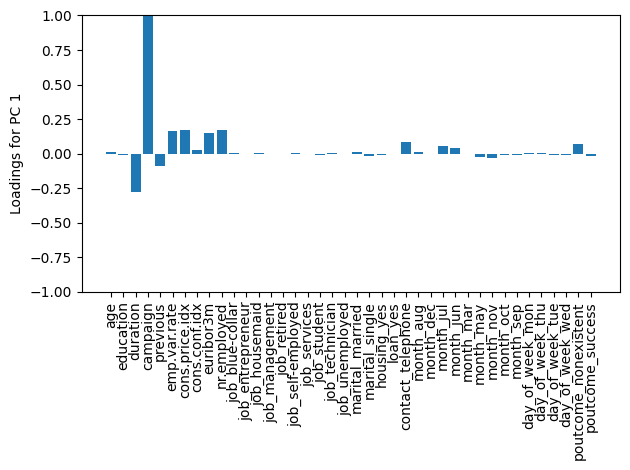

In [69]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()
ax.bar(range(sklearn_loadings.shape[0]), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(sklearn_loadings.shape[0]))
# Use the correct feature columns used in PCA for labels
ax.set_xticklabels(X.columns, rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In the figure above, we can see that, for example, `campaign` has a strong positive correlation with the first principal component (approximately 1), whereas `duration` has a negative correlation (approximately 0.26).

### Data Imbalance
As noted from the previous distribution section 36,548 of 41,188 (about 88.7%) of outcomes were a `no`. In order to account for this data imbalance, we have a few options, each with their own advantages and disadvantages:
| Method | Pros | Cons |
| :--- | :--- | :--- |
| **Oversampling Minority Class** | - No data loss. <br> - Simple to implement. | - Can lead to overfitting.  |
| **Undersampling Majority Class** | - Faster training. <br> - Can reduce noise. | - **Discards valuable data**. |
| **Assign larger penalty to the minority class** | - Doesn't alter original data. <br> - Simple to implement. <br> - Directly targets misclassification. | - Model is still trained on imbalanced data. <br> - Requires hyperparameter tuning. |
| **Generating synthetic samples** | - No information loss. <br> - Prevents overfitting better. | - Can introduce noise. |


Given our specific dataset, it's not recommended to oversample the minority class to match the majority class or generating synthetic samples as we'll be introducing too much duplication and would likely overfit the model or introduce too much noise.

As assigning a larger penaltiy to the minority class is done during model development, we will sample our dataset to undersample the majority class in the dataframe below:

In [77]:
# Creating our random sampler
rus = RandomUnderSampler(random_state=2111994)

# Defining an x and y for our data
df_sampled = rus.fit_resample(df_standardized.drop('y', axis=1),df_standardized['y'])
df_undersampled = {
    'x' : df_sampled[0],
    'y' : df_sampled[1]
}

# Show the balance of the data after the resampling
df_undersampled['y'].value_counts()

y
False    4257
True     4257
Name: count, dtype: int64

With our dataset undersampled, we can see that we have rebalanced our data to align perfectly.